<a href="https://colab.research.google.com/github/KatiaArruda/Previsoes-com-machine-learning/blob/main/Previsoes_com_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os

# Get the current working directory
current_dir = os.getcwd()

# Construct the full path to the CSV file
file_path = os.path.join(current_dir, "clientes.csv")

# Now use the full path to read the CSV file
tabela = pd.read_csv(file_path)

# Show the first few rows of the DataFrame
display(tabela.head())


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,26.822620,265.0,21.46538,alto_gasto_pagamento_baixos,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,Bom,809.98,31.944960,266.0,21.46538,baixo_gasto_pagamento_alto,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,Bom,809.98,28.609352,267.0,21.46538,baixo_gasto_pagamento_medio,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,Bom,809.98,31.377862,268.0,21.46538,baixo_gasto_pagamento_baixo,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,cientista,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,Bom,809.98,24.797347,269.0,21.46538,alto_gasto_pagamento_medio,341.489231,Good,1,1,1,1,0


In [ ]:
display(tabela.info())

In [ ]:
#LabelEnconder
from sklearn.preprocessing import LabelEncoder

#Profession | credit_mix | payment_behavior -> adjust the column to numeric

coluna_profissao = LabelEncoder()
tabela['profissao'] = coluna_profissao.fit_transform(tabela['profissao'])

coluna_mix_credito = LabelEncoder()
tabela['mix_credito'] = coluna_mix_credito.fit_transform(tabela['mix_credito'])

coluna_comportamento_pagamento = LabelEncoder()
tabela['comportamento_pagamento'] = coluna_comportamento_pagamento.fit_transform(tabela['comportamento_pagamento'])

display(tabela.head())



,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,26.822620,265.0,21.46538,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,0,809.98,31.944960,266.0,21.46538,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,28.609352,267.0,21.46538,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,0,809.98,31.377862,268.0,21.46538,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,0,809.98,24.797347,269.0,21.46538,2,341.489231,Good,1,1,1,1,0


In [ ]:
# y -> is the column in the database that will be used for prediction.
y = tabela ["score_credito"]

# X -> the columns in the database that will be used for prediction; these listed columns will be removed.
x = tabela.drop(columns=["score_credito","id_cliente"])

# split into training data and test data
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)


In [ ]:
# Training models (RandomForest, Neighbors - KNN)

# Import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Create the model
modelo_random_forest = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()
# Train the model
modelo_random_forest.fit(x_treino, y_treino)
modelo_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [ ]:
#Validation
from sklearn.metrics import accuracy_score

#RandomForest
previsao_random_forest = modelo_random_forest.predict(x_teste)
acuracia_random_forest = accuracy_score(y_teste, previsao_random_forest)
print(f"Acurácia do modelo Random Forest: {acuracia_random_forest}")


Acurácia do modelo Random Forest: 0.8261333333333334


In [ ]:
#Validation

#Neighbors
previsao_knn = modelo_knn.predict(x_teste)
acuracia_knn = accuracy_score(y_teste, previsao_knn)
print(f"Acurácia do modelo KNN: {acuracia_knn}")


Acurácia do modelo KNN: 0.7324


In [ ]:
#New Forecast

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Adjust the setting to show all columns
pd.set_option('display.max_columns', None)

# Load the data
tabela = pd.read_csv("clientes.csv")
tabela_novos_clientes = pd.read_csv("novos_clientes.csv")

# Check if columns exist
colunas_necessarias = ['profissao', 'mix_credito', 'comportamento_pagamento']
for coluna in colunas_necessarias:
    if coluna not in tabela.columns:
        raise ValueError(f"Coluna '{coluna}' não encontrada no DataFrame 'tabela'")
    if coluna not in tabela_novos_clientes.columns:
        raise ValueError(f"Coluna '{coluna}' não encontrada no DataFrame 'tabela_novos_clientes'")

# Create the LabelEncoders
coluna_profissao = LabelEncoder()
coluna_mix_credito = LabelEncoder()
coluna_comportamento_pagamento = LabelEncoder()

# Train LabelEncoders with original data
tabela['profissao'] = coluna_profissao.fit_transform(tabela['profissao'])
tabela['mix_credito'] = coluna_mix_credito.fit_transform(tabela['mix_credito'])
tabela['comportamento_pagamento'] = coluna_comportamento_pagamento.fit_transform(tabela['comportamento_pagamento'])

# Transform the new data using the trained LabelEncoders
tabela_novos_clientes['profissao'] = coluna_profissao.transform(tabela_novos_clientes['profissao'])
tabela_novos_clientes['mix_credito'] = coluna_mix_credito.transform(tabela_novos_clientes['mix_credito'])
tabela_novos_clientes['comportamento_pagamento'] = coluna_comportamento_pagamento.transform(tabela_novos_clientes['comportamento_pagamento'])

# Display the first rows of the DataFrame
display(tabela.head())
display(tabela_novos_clientes.head())

# Make the forecast
previsao = modelo_random_forest.predict(tabela_novos_clientes)
print(previsao)


,id_cliente,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,score_credito,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,3392,1,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,26.822620,265.0,21.46538,1,312.494089,Good,1,1,1,1,0
1,3392,2,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,4.0,4.0,0,809.98,31.944960,266.0,21.46538,3,284.629162,Good,1,1,1,1,0
2,3392,3,23.0,2,19114.12,3.0,4.0,3.0,4.0,3.0,7.0,4.0,0,809.98,28.609352,267.0,21.46538,5,331.209863,Good,1,1,1,1,0
3,3392,4,23.0,2,19114.12,3.0,4.0,3.0,4.0,5.0,4.0,4.0,0,809.98,31.377862,268.0,21.46538,4,223.451310,Good,1,1,1,1,0
4,3392,5,23.0,2,19114.12,3.0,4.0,3.0,4.0,6.0,4.0,4.0,0,809.98,24.797347,269.0,21.46538,2,341.489231,Good,1,1,1,1,0


,mes,idade,profissao,salario_anual,num_contas,num_cartoes,juros_emprestimo,num_emprestimos,dias_atraso,num_pagamentos_atrasados,num_verificacoes_credito,mix_credito,divida_total,taxa_uso_credito,idade_historico_credito,investimento_mensal,comportamento_pagamento,saldo_final_mes,emprestimo_carro,emprestimo_casa,emprestimo_pessoal,emprestimo_credito,emprestimo_estudantil
0,1,31.0,5,19300.340,6.0,7.0,17.0,5.0,52.0,19.0,7.0,2,2430.21,29.934186,218.0,44.50951,4,312.487689,1,1,0,0,0
1,4,32.0,0,12600.445,5.0,5.0,10.0,3.0,25.0,18.0,7.0,1,569.80,28.819407,12.0,0.00000,5,300.994163,0,0,0,0,1
2,2,48.0,5,20787.690,8.0,6.0,14.0,7.0,24.0,14.0,3.0,1,614.60,34.235853,215.0,0.00000,3,345.081577,0,1,0,1,0


['Poor' 'Standard' 'Standard']


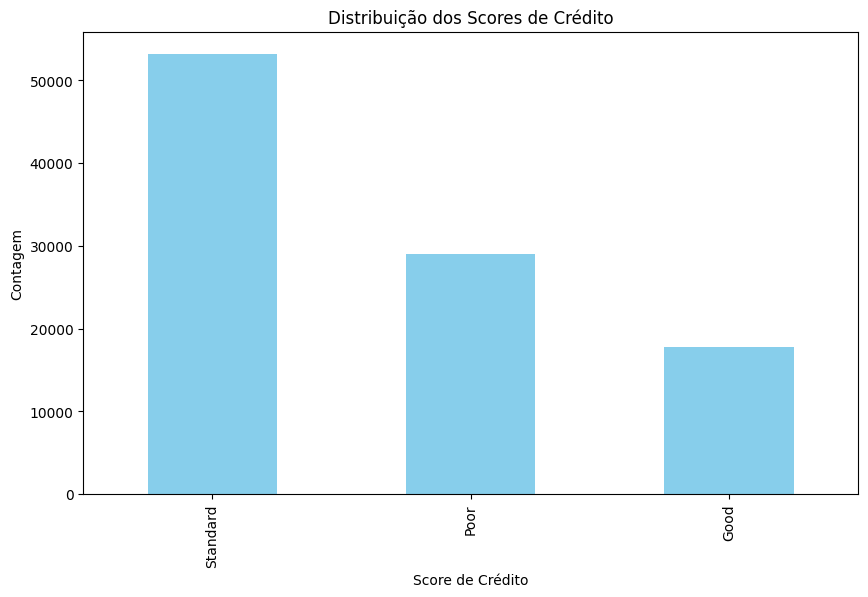

In [ ]:
#Result

import matplotlib.pyplot as plt

# Credit score count
score_counts = tabela['score_credito'].value_counts()

# Plotting the distribution of credit scores
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição dos Scores de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Contagem')
plt.show()

